# Reddit News Headlines and Stock Market Performance

In the current financial market, predicting daily stock prices using daily news as input is clearly a very complex task. Moreover, the market is very volatile because it is a result of multiple factors that change continuously. 

In this project, we will apply machine learning concepts on a reddit news dataset to try and predict the Dow Jones index output.  


Our research questions are centered around using reddit data to predict the stock market in two different ways, using text word count and using text sentiment of reddit headlines. 

Our research questions are:

<b> 1. Can the text content of reddit daily news headlines be used to predict past stock prices? </b>

<b>    2. Can the sentiment of reddit daily news headlines be used to predict past stock prices? </b>


## Load and Clean Data

In [4]:
#
import pandas as pd

#com_news_df = pd.read_csv("C:/Users/Yonas/OneDrive/Desktop/IMT 575/Group Project/Files/Combined_News_DJIA.csv")
com_news_df = pd.read_csv('data/Combined_News_DJIA.csv')
com_news_df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
# look at the top1 headlines
com_news_df.shape

(1989, 27)

In [6]:
#DJIA_data = pd.read_csv('C:/Users/Yonas/OneDrive/Desktop/IMT 575/Group Project/Files/upload_DJIA_table.csv')
DJIA_data = pd.read_csv('data/upload_DJIA_table.csv')

DJIA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [4]:
print(com_news_df.shape, DJIA_data.shape )

(1989, 27) (1989, 7)


Merge the Dow Jones and the top news from reddit together. Also create a copy of the DF in order to use for sentiment later

In [7]:
merged_data = com_news_df.merge(DJIA_data, how = 'inner', on = 'Date', left_index = True)

merged_data_sent = merged_data.copy()

In [6]:
merged_data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727


Merge all 25 top headlines together

In [8]:
# to combine the first 5 coulums of the top news in
top25_headlines = []

for row in range(0, len(merged_data.index)):
    top25_headlines.append(' '.join( str(x) for x in merged_data.iloc[row, 2:27]))
    
    
# merged_data[:28,'top5_headlines'] = top5_headlines
# merged_data.head

In [9]:
merged_data.insert(2, "top25_headlines", top25_headlines, True)
merged_data.head()

# 

,Date,Label,top25_headlines,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...","b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,b'All the experts admit that we should legalis...,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [132]:
# merged_data.insert(26, "top25_headlines", top25_headlines, True)
# merged_data

Optionally delete other extra columns of data [2:27]]


In [13]:

#merged_data.drop(merged_data.iloc[:, 3:28], inplace = True, axis = 1)
#merged_data

,Date,Label,top25_headlines,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,b'All the experts admit that we should legalis...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...,...,...
4,2016-06-27,0,Barclays and RBS shares suspended from trading...,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
3,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...",17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2,2016-06-29,1,Explosion At Airport In Istanbul Yemeni former...,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


Sort the columns by Date

In [10]:
merged_data = merged_data.sort_values(by="Date")
merged_data

,Date,Label,top25_headlines,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...","b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,b'All the experts admit that we should legalis...,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2016-06-27,0,Barclays and RBS shares suspended from trading...,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips bel

# Preprocessing the code

Use regex to remove stopwords and to lemmatize all of the top 25 headlines

In [16]:
import regex as re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def prepro_text(target_text):
    # if b'/b"
    target_text = re.sub(r"^b[\'\"]", '', target_text)
    target_text = re.sub(r"[^\w\s]", '', target_text)
    target_text = target_text.lower().strip()
    target_text = target_text.split()
    target_text = ' '.join([x for x in target_text if x not in stopwords.words('english')])
    return target_text

In [17]:
# applymap to the whole dataframe



merged_data.iloc[:,2] = merged_data.iloc[:,2:].applymap(lambda element:prepro_text(str(element)))
merged_data.head()

# restart and run the following code only once!
# com_news_df.to_csv('cleaned_Combined_News_DJIA.csv')

KeyboardInterrupt: 

<h1> Jacky Section Start </h1>

<h1> Run Model for TFIDF and Embeddings </h1>

Import train test split. Use the top 25 headlines combined together as the X variable. 

The Y variable is the Label which shows whether or not the stock market went up or down

In [21]:
from sklearn.model_selection import train_test_split

X = merged_data['top25_headlines']
y = merged_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Import the count vectorizer and tensorflow

In [22]:
# # only run once for the following code!

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
from sklearn.preprocessing import MaxAbsScaler
# Universal Sentence Encoder
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use = hub.load(module_url)
print("module %s loaded" % module_url)
import numpy as np

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


Import the Tfidf vectorizer. 

Create a function to run the model with either TFIDF or embedding.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
# return the vectors
def text_vector(target_method='tfidf', \
                target_list_train=X_train.to_list(),\
                target_list_test = X_test.to_list(),\
                max_features=None):
    """
    type: target_method: string - ("tfidf", "embedding")
    rtype: list of vectors
    """
    

    if target_method == "embedding":
        use_x_train = []
        use_x_test = []
        use_x_train = use(target_list_train)
        use_x_test = use(target_list_test)
        return use_x_train, use_x_test
    
    if target_method == "tfidf":
        vectorizer = TfidfVectorizer(max_features=max_features)
        tfidf_train = vectorizer.fit_transform(target_list_train)
        tfidf_test = vectorizer.transform(target_list_test)
        tfidf_scaler = MaxAbsScaler()
        tfidf_x_train = tfidf_scaler.fit_transform(tfidf_train)
        tfidf_x_test = tfidf_scaler.transform(tfidf_test)
        return tfidf_x_train, tfidf_x_test

<b> Run with TFIDF Logistic Regression </b>

In [24]:
%%time

tfidf_x_train, tfidf_x_test = text_vector("tfidf", X_train, X_test)

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(tfidf_x_train, y_train)

predictions = logmodel.predict(tfidf_x_test)
print(accuracy_score(y_test, predictions))

'''
It looks like we can not use the logistic regression to make 
predictions, so the data sets might not be linearly seperateble,
so we are thinking about using SVM to solve these problems. 

'''

0.4648241206030151
Wall time: 3.79 s


'\nIt looks like we can not use the logistic regression to make \npredictions, so the data sets might not be linearly seperateble,\nso we are thinking about using SVM to solve these problems. \n\n'

### Embeddings

In [25]:
%%time

# embedding
embedding_x_train, embedding_x_test = text_vector("embedding")

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(embedding_x_train, y_train)

predictions = logmodel.predict(embedding_x_test)
print(accuracy_score(y_test, predictions))

'''
It looks like embedding is performing a litting bit better
'''

0.5201005025125628
Wall time: 11.7 s


'\nIt looks like embedding is performing a litting bit better\n'

<h3> MLP classfier </h3>


In [32]:
top25_embedding = use(merged_data['top25_headlines'].to_list())

merged_data['Top25_headlines'] = top25_embedding

use_x_train = []
use_x_test = []

use_x_train = use(X_train.top25_headlines)
use_x_test = use(X_test.top25_headlines)




In [33]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(random_state = 1, max_iter = 300).fit(use_x_train, y_train)
predictions = clf.predict(use_x_test)

accuracy_score(y_test, predictions)

AttributeError: 'Series' object has no attribute 'top25_headlines'

# Text related to stock 

### Filter the dataset for stock related keywords

Filter for stock related keywords. 

Used the column with the top 25 headlines to get the new dataframe with stock keywords only. 

The new dataframe has 553 rows.

In [11]:
stock_related_keywords = "stock|market|feds|bond|bonds|stocks|bull|bear"

import numpy as np

temp_df = merged_data.copy()

merged_data_keywords = temp_df[['top25_headlines', 'Label']]

merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)

mask = np.column_stack([merged_data_keywords[col].str.contains(stock_related_keywords, na=False) for col in merged_data_keywords])
stock_keyword = merged_data_keywords.loc[mask.any(axis=1)]

stock_keyword['Label'] = stock_keyword['Label'].astype(int)
 
stock_keyword

#backup code

# for keyword in merged_data_keywords['top25_headlines']:
#     if keyword.contains('Georgia'):
#         print('this is georgia')
    
#mask = np.column_stack([merged_data_keywords[col].str.contains(r"stock|market|feds|bond|stocks|bull|bear", na=False) for col in merged_data_keywords])
#mask = np.column_stack([df[col].str.contains(r"\^", na=False) for col in df])
#df.loc[mask.any(axis=1)]

<ipython-input-11-f45cd3e3d418>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)
<ipython-input-11-f45cd3e3d418>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_keyword['Label'] = stock_keyword['Label'].astype(int)


,top25_headlines,Label
1977,"b""N Korea's Kim died in 2003; replaced by look...",0
1973,b'Russian Prime Minister Vladimir Putin has ac...,0
1969,"b'In Jordan, the honor killings that are not: ...",1
1961,b'Attack on US embassy in Yemen leaves 16 dead...,0
1959,b'Brits take a stand - ban short-selling of fi...,1
...,...,...
11,Decriminalisation Call As 'War On Drugs' Fails...,1
9,A staggering 87 percent of Venezuelans say the...,1
5,David Cameron to Resign as PM After EU Referen...,0
4,Barclays and RBS shares suspended from trading...,0


In [34]:
stock_related_keywords = "stock|market|feds|bond|bonds|stocks|bull|bear"

import numpy as np

temp_df = merged_data.copy()

merged_data_keywords = temp_df[['top25_headlines', 'Label']]

merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)

mask = np.column_stack([merged_data_keywords[col].str.contains(stock_related_keywords, na=False) for col in merged_data_keywords])
stock_keyword = merged_data_keywords.loc[mask.any(axis=1)]

stock_keyword['Label'] = stock_keyword['Label'].astype(int)
 
stock_keyword

<ipython-input-34-c6baad468d72>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)
<ipython-input-34-c6baad468d72>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_keyword['Label'] = stock_keyword['Label'].astype(int)


,top25_headlines,Label
1977,"b""N Korea's Kim died in 2003; replaced by look...",0
1973,b'Russian Prime Minister Vladimir Putin has ac...,0
1969,"b'In Jordan, the honor killings that are not: ...",1
1961,b'Attack on US embassy in Yemen leaves 16 dead...,0
1959,b'Brits take a stand - ban short-selling of fi...,1
...,...,...
11,Decriminalisation Call As 'War On Drugs' Fails...,1
9,A staggering 87 percent of Venezuelans say the...,1
5,David Cameron to Resign as PM After EU Referen...,0
4,Barclays and RBS shares suspended from trading...,0


Train test split for stock keyword

In [35]:
from sklearn.model_selection import train_test_split

X = stock_keyword['top25_headlines']
y = stock_keyword.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state=1)

### Run With TFIDF

In [37]:
tfidf_x_train, tfidf_x_test = text_vector("tfidf", \
                                          X_train,\
                                          X_test
                                         )

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(tfidf_x_train,y_train)
predictions = logmodel.predict(tfidf_x_test)

accuracy_score(y_test, predictions)

0.5135135135135135

## Run with MLP

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(random_state = 1, max_iter = 300).fit(tfidf_x_train, y_train)
predictions = clf.predict(tfidf_x_test)

accuracy_score(y_test, predictions)

0.5315315315315315

In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(use_x_train,y_train)
predictions = logmodel.predict(use_x_test)

accuracy_score(y_test, predictions)

0.5405405405405406

In [40]:
use_x_train = []
use_x_test = []

use_x_train = use(X_train)
use_x_test = use(X_test)

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(random_state = 1, max_iter = 300).fit(use_x_train, y_train)
predictions = clf.predict(use_x_test)

accuracy_score(y_test, predictions)

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.46846846846846846

<h1> Jacky Section End </h1>

<H1> Sentiment Analysis </h1>

Write function to get the sentiment using vader and textblob.

In [47]:
#uses textblob to get the sentiment scores of the column 
import nltk
nltk.download('vader_lexicon')
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment import vader
sia = vader.SentimentIntensityAnalyzer()

def text_sent(target_method, target_list_text):
    """
    
    rtype: list of entiment scores
    """
    if target_method == 'blob':
        blob_list = []
        for title in target_list_text:
            blob = TextBlob(title)
            blob_list.append(blob.sentiment.polarity)
    
        return blob_list
    
    if target_method == 'NLTK':
        NLTK_list = []

        for title in target_list_text:
            sia_polarity = sia.polarity_scores(title)
            NLTK_list.append(sia_polarity['compound'])
        return NLTK_list

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Get the average sentiment

In [48]:
#For some reason can't get the sentiment for the last 3 columns

# Average sentiment for column by blob

column_list_blob = []

for i in range(1,23):
    #print(i,'i is')
    i_str = str(i)
    Topic = ('Top'+i_str) # 'Top' + 1 = 'Top1'
    Topic_sent_blob = (Topic + '_sent_' 'blob') 
    topic_list = text_sent("blob",merged_data_sent[Topic])
    merged_data_sent[Topic_sent_blob] = topic_list
    column_list_blob.append(Topic_sent_blob)


merged_data_sent_sum_blob = merged_data_sent[column_list_blob].sum(axis=1)
merged_data_sent["average_blob_sent"] = merged_data_sent_sum_blob / 22

 
# Average sentiment by column for NLTK   


column_list_nltk = []

for i in range(1,23):
    i_str = str(i)
    Topic = ('Top'+i_str)
    Topic_sent_nltk = (Topic + '_sent_' 'NLTK')
    topic_list = text_sent("NLTK",merged_data_sent[Topic])
    merged_data_sent[Topic_sent_nltk] = topic_list
    column_list_nltk.append(Topic_sent_nltk)

merged_data_sent_sum_nltk = merged_data_sent[column_list_nltk].sum(axis=1)
merged_data_sent["average_nltk_sent"] = merged_data_sent_sum_nltk / 22 
    


In [93]:
merged_data_sent['Top23']

1988    b'Indian shoe manufactory  - And again in a se...
1987    b'Perhaps *the* question about the Georgia - R...
1986    b'Christopher King argues that the US and NATO...
1985    b' Quarter of Russians blame U.S. for conflict...
1984    b'Russia: World  "can forget about" Georgia\'s...
                              ...                        
4       Economists predict UK recession, further weake...
3       Brexit: Gibraltar in talks with Scotland to st...
2       Extremist violence on the rise in Germany: Dom...
1       We will be swimming in ridicule - French beach...
0       Venezuela, where anger over food shortages is ...
Name: Top23, Length: 1989, dtype: object

Create a DF with just the average blob sent and the average nltk sent. Get the average sent for each day

In [49]:
label_sent_df= merged_data_sent[['average_nltk_sent', 'average_blob_sent', 'Label']]

print('average NLTK sent is' , round(label_sent_df["average_nltk_sent"].mean(),2))
print('average Blob sent is' , round(label_sent_df["average_blob_sent"].mean(),2))
label_sent_df

average NLTK sent is -0.21
average Blob sent is 0.01


,average_nltk_sent,average_blob_sent,Label
1988,-0.318659,-0.048722,0
1987,-0.114414,0.030705,1
1986,-0.264577,-0.041955,0
1985,-0.131123,0.005201,0
1984,-0.157518,0.054723,1
...,...,...,...
4,-0.150886,-0.007135,0
3,-0.003755,0.036262,1
2,-0.282536,0.034246,1
1,-0.214800,0.020274,1


Check if positive sentiment for the day is related to a rise in stock prices. 

If the Dow Jones went up and the sentiment was postive mark as "correct". If the Dow Jones went up and sentiment was down mark as incorrect. 

If the Dow Jones went down and the sentiment was postive mark as "incorrect". If the Dow Jones went down and sentiment was down marka as incorrect. 

Do this for both vader and blob.

In [50]:
nltk_correct = []
blob_correct = []


for average_nltk_sent, average_blob_sent, Label in label_sent_df.itertuples(index=False):
    if average_nltk_sent <0:
        if Label == 0:
            correct = 1
            nltk_correct.append(1)
        else:
            correct = 0
            nltk_correct.append(0)
    else:
    #if average_nltk_sent > 0:
        if Label == 1:
            correct = 1
            nltk_correct.append(1)
        else:
            correct = 0
            nltk_correct.append(0)
            
    if average_blob_sent <0:
        if Label == 0:
            correct = 1
            blob_correct.append(1)
        else:
            correct = 0
            blob_correct.append(0)
    else:
    #if average_nltk_sent > 0:
        if Label == 1:
            correct = 1
            blob_correct.append(1)
        else:
            correct = 0
            blob_correct.append(0)

label_sent_df['nltk_correct_score'] = nltk_correct
label_sent_df['blob_correct_score'] = blob_correct

    
label_sent_df 



<ipython-input-50-47767e55fe5a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['nltk_correct_score'] = nltk_correct
<ipython-input-50-47767e55fe5a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['blob_correct_score'] = blob_correct


,average_nltk_sent,average_blob_sent,Label,nltk_correct_score,blob_correct_score
1988,-0.318659,-0.048722,0,1,1
1987,-0.114414,0.030705,1,0,1
1986,-0.264577,-0.041955,0,1,1
1985,-0.131123,0.005201,0,1,0
1984,-0.157518,0.054723,1,0,1
...,...,...,...,...,...
4,-0.150886,-0.007135,0,1,1
3,-0.003755,0.036262,1,0,1
2,-0.282536,0.034246,1,0,1
1,-0.214800,0.020274,1,0,1


Insert extra columns in DF showing if the blob or vader sent was negative or postive

In [51]:
import numpy as np

average_blob_sent_pos = []
for x in label_sent_df['average_blob_sent']:
    if x > 0:
        average_blob_sent_pos.append(1)
    else:
        average_blob_sent_pos.append(0)

label_sent_df['average_blob_sent_pos'] = average_blob_sent_pos

average_nltk_sent_pos = []
for x in label_sent_df['average_nltk_sent']:
    if x > 0:
        average_nltk_sent_pos.append(1)
    else:
        average_nltk_sent_pos.append(0)

label_sent_df['average_nltk_sent_pos'] = average_nltk_sent_pos


label_sent_df['nltk_equals_blob_pos'] = (label_sent_df['average_nltk_sent_pos']==label_sent_df['average_blob_sent_pos']).astype(int)

label_sent_df



<ipython-input-51-a66349117472>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['average_blob_sent_pos'] = average_blob_sent_pos
<ipython-input-51-a66349117472>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['average_nltk_sent_pos'] = average_nltk_sent_pos
<ipython-input-51-a66349117472>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,average_nltk_sent,average_blob_sent,Label,nltk_correct_score,blob_correct_score,average_blob_sent_pos,average_nltk_sent_pos,nltk_equals_blob_pos
1988,-0.318659,-0.048722,0,1,1,0,0,1
1987,-0.114414,0.030705,1,0,1,1,0,0
1986,-0.264577,-0.041955,0,1,1,0,0,1
1985,-0.131123,0.005201,0,1,0,1,0,0
1984,-0.157518,0.054723,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...
4,-0.150886,-0.007135,0,1,1,0,0,1
3,-0.003755,0.036262,1,0,1,1,0,0
2,-0.282536,0.034246,1,0,1,1,0,0
1,-0.214800,0.020274,1,0,1,1,0,0


Create plots based of the amount of postives days for both vader and blob sent. 

Also compare how many of the vader sentiment matching the blob sentiment. 

<ipython-input-52-ac2f5ac9d12d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['nltk_equals_blob_pos'] = label_sent_df.nltk_equals_blob_pos.astype(bool)
<ipython-input-52-ac2f5ac9d12d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['average_blob_sent_pos'] = label_sent_df.average_blob_sent_pos.astype(bool)
<ipython-input-52-ac2f5ac9d12d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

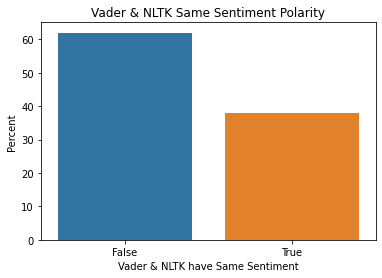

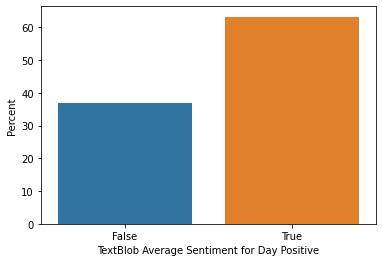

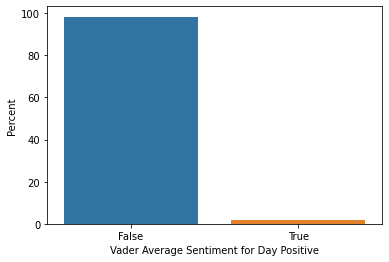

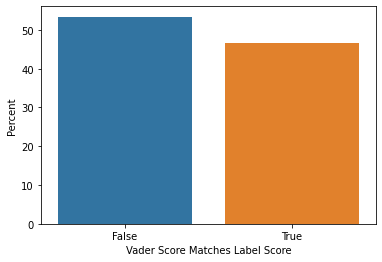

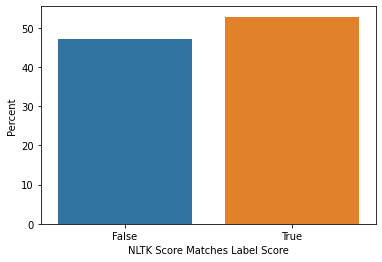

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

label_sent_df['nltk_equals_blob_pos'] = label_sent_df.nltk_equals_blob_pos.astype(bool)
label_sent_df['average_blob_sent_pos'] = label_sent_df.average_blob_sent_pos.astype(bool)
label_sent_df['average_nltk_sent_pos'] = label_sent_df.average_nltk_sent_pos.astype(bool)
label_sent_df['nltk_correct_score'] = label_sent_df.nltk_correct_score.astype(bool)
label_sent_df['blob_correct_score'] = label_sent_df.blob_correct_score.astype(bool)


percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['nltk_equals_blob_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent", xlabel = 'Vader & NLTK have Same Sentiment', title = 'Vader & NLTK Same Sentiment Polarity')
plt.show()


percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['average_blob_sent_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent", xlabel = 'TextBlob Average Sentiment for Day Positive')
plt.show()


percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['average_nltk_sent_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent", xlabel = 'Vader Average Sentiment for Day Positive')
plt.show()


x= label_sent_df['nltk_correct_score']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent", xlabel = 'Vader Score Matches Label Score')
plt.show()

x= label_sent_df['blob_correct_score']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent", xlabel = 'NLTK Score Matches Label Score')
plt.show()







In [75]:
#label_sent_df['blob_correct_score'].sum()
#label_sent_df['nltk_correct_score'].sum()

# Sentiment Decision Tree and Logistic Regression

# Logistic Regression Model

In [55]:
X = merged_data_sent[['average_blob_sent']]
X = merged_data_sent[['average_nltk_sent']]

X

,average_nltk_sent
1988,-0.318659
1987,-0.114414
1986,-0.264577
1985,-0.131123
1984,-0.157518
...,...
4,-0.150886
3,-0.003755
2,-0.282536
1,-0.214800


Do a simple logistic regression model using sentiment to predict if stocks went up or down

Use text blob and NLTK as the X and the Label of whether stock went down or up as the y

<b> Blob </b>

In [56]:
#need to split into blob and NLTK and not combine together.



from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear')


X = merged_data_sent[['average_blob_sent']]
y = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

              precision    recall  f1-score   support

           0       0.25      0.01      0.01       186
           1       0.53      0.99      0.69       212

    accuracy                           0.53       398
   macro avg       0.39      0.50      0.35       398
weighted avg       0.40      0.53      0.37       398



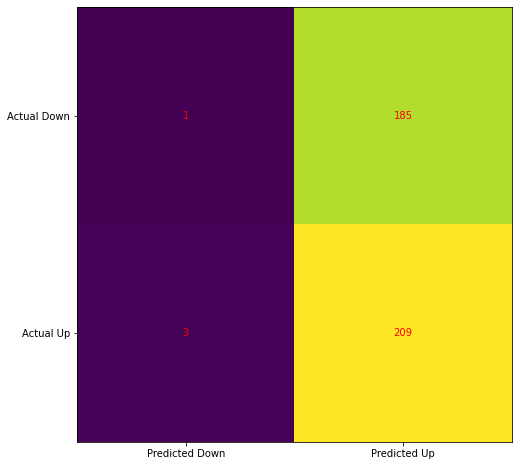

In [60]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions_blob = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

cm = confusion_matrix(y_test, predictions_blob)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

<b> NLTK </b>

In [61]:
#need to split into blob and NLTK and not combine together.



from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)


X = merged_data_sent[['average_nltk_sent']]
y = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       170
           1       0.57      1.00      0.73       228

    accuracy                           0.57       398
   macro avg       0.29      0.50      0.36       398
weighted avg       0.33      0.57      0.42       398



C:\Users\Josh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


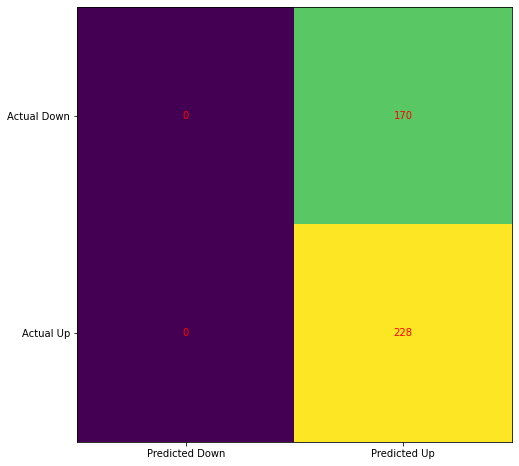

In [62]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions_nltk = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_nltk))

cm = confusion_matrix(y_test, predictions_nltk)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Decision Tree Classifier

<b> TextBlob </b>

In [63]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier()

X_blob = merged_data_sent[['average_blob_sent']]
y_blob = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2)

Decision Tree Classifier using text blob 
               precision    recall  f1-score   support

           0       0.46      0.46      0.46       191
           1       0.50      0.51      0.50       207

    accuracy                           0.48       398
   macro avg       0.48      0.48      0.48       398
weighted avg       0.48      0.48      0.48       398



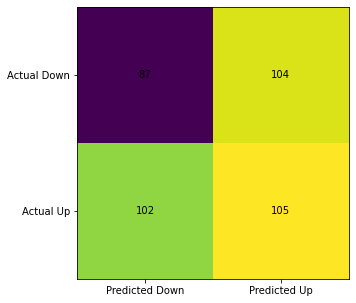

In [64]:
y_predict_blob = classifier_tree.fit(X_train, y_train).predict(X_test)

print("Decision Tree Classifier using text blob \n",classification_report(y_test, y_predict_blob))


cm = confusion_matrix(y_test, y_predict_blob)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

### NLTK (Vader)

In [66]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier()

X_nltk = merged_data_sent[['average_nltk_sent']]
y_nltk = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X_nltk, y_nltk, test_size=0.2)

Decision Tree Classifier using NLTK 
               precision    recall  f1-score   support

           0       0.48      0.47      0.48       182
           1       0.56      0.57      0.57       216

    accuracy                           0.53       398
   macro avg       0.52      0.52      0.52       398
weighted avg       0.52      0.53      0.52       398



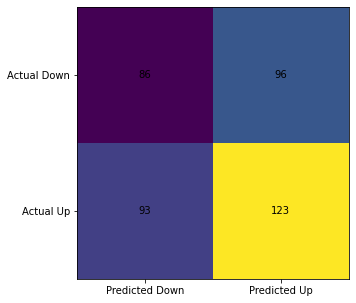

In [67]:
y_predict_nltk = classifier_tree.fit(X_train, y_train).predict(X_test)

print("Decision Tree Classifier using NLTK \n", classification_report(y_test, y_predict_nltk))



cm = confusion_matrix(y_test, y_predict_nltk)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

# Conclusions